# Iris Flower Species Classification

![Task 1](task1.png)

#### Importing the data set

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [78]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
replace_dict = {
    'Iris-setosa': 'setosa',
    'Iris-versicolor': 'versicolor',
    'Iris-virginica': 'virginica'
}

In [80]:
data['Species'] = data['Species'].replace(replace_dict)

In [81]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [82]:
data.drop('Id',axis=1,inplace=True)

In [83]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='Species', ylabel='count'>

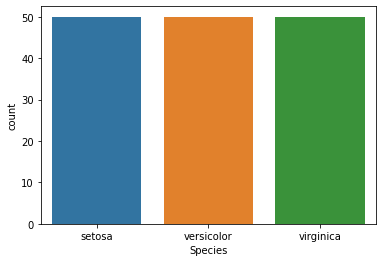

In [84]:
sns.countplot(data=data,x='Species')

In [85]:
data = pd.get_dummies(data,columns=['Species'],drop_first=True)

In [86]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_versicolor,Species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [87]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [90]:
lr.fit(X_train,y_train)

LogisticRegression()

In [91]:
pr = lr.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,pr)
print(f"Accuracy: {score:.2f}")

Accuracy: 1.00


In [96]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.98
